In [1]:
import numpy as np
import matplotlib.pyplot as plt

Open water equations:

$$
\begin{eqnarray}
J &=& \frac{V}{n D} \\
K_T &=& \frac{T}{\rho n^2 D^4} \\
K_Q &=& \frac{Q}{\rho n^2 D^5} \\
\end{eqnarray}
$$


4-quadrant equations:

$$
\begin{eqnarray}
\beta &=& \tan^{-1} \left( \frac{V}{0.7 \pi n D} \right) \\
C_T &=& \frac{8T}{\left(V^2 + \left( 0.7 \pi n D \right)^2 \right) \pi \rho D^2} \\
C_Q &=& \frac{8Q}{\left(V^2 + \left( 0.7 \pi n D \right)^2 \right) \pi \rho D^3} \\
\end{eqnarray}
$$


How to convert open-water numbers into 4-quadrant data??? To start, $\beta$ is easy:

$$
\beta = \tan^{-1} \left( \frac{J}{0.7 \pi} \right)
$$


For $C_T$, the trick is to substitute $T$ for $K_T$ and add a $J^2$ term somehow.

$$
\begin{eqnarray}
C_T &=& \frac{8 K_T \rho n^2 D^4}{\left(V^2 + \left( 0.7 \pi n D \right)^2 \right) \pi \rho D^2} \\
C_T &=& \frac{8}{\pi} \frac{K_T n^2 D^2}{V^2 + \left( 0.7 \pi n D \right)^2} \\
C_T &=& \frac{8}{\pi} \frac{K_T}{\frac{V^2}{n^2 D^2} +  0.7^2 \pi^2} \\
C_T &=& \frac{8}{\pi} \frac{K_T}{J^2 +  0.7^2 \pi^2} \\
\end{eqnarray}
$$


The formulas for $C_T$ and $C_Q$ are almost identical.

$$
\begin{eqnarray}
C_Q &=& \frac{8 K_Q \rho n^2 D^5}{\left(V^2 + \left( 0.7 \pi n D \right)^2 \right) \pi \rho D^3} \\
C_Q &=& \frac{8}{\pi} \frac{K_Q n^2 D^2}{V^2 + \left( 0.7 \pi n D \right)^2} \\
C_Q &=& \frac{8}{\pi} \frac{K_Q}{\frac{V^2}{n^2 D^2} +  0.7^2 \pi^2} \\
C_Q &=& \frac{8}{\pi} \frac{K_Q}{J^2 +  0.7^2 \pi^2} \\
\end{eqnarray}
$$

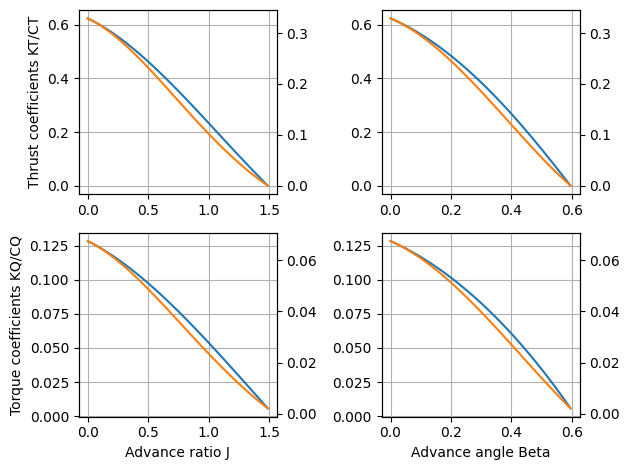

In [2]:
import propy as pp
prop = pp.WageningenBPropeller(blades=4, area_ratio=0.7, pd_ratio=1.4)

j = np.linspace(0, prop.j_max)
beta = np.atan(j / 0.7 / np.pi)
kt = prop.kt(j)
kq = prop.kq(j)
ct = 8 * kt / np.pi / (j**2 + 0.7**2 * np.pi**2)
cq = 8 * kq / np.pi / (j**2 + 0.7**2 * np.pi**2)

fig, axs = plt.subplots(nrows=2, ncols=2)
axs[0, 0].plot(j, kt)
axs[0, 0].twinx().plot(j, ct, color='C1')
axs[0, 1].plot(beta, kt)
axs[0, 1].twinx().plot(beta, ct, color='C1')
axs[1, 0].plot(j, kq)
axs[1, 0].twinx().plot(j, cq, color='C1')
axs[1, 1].plot(beta, kq)
axs[1, 1].twinx().plot(beta, cq, color='C1')
axs[0, 0].set_ylabel('Thrust coefficients KT/CT')
axs[1, 0].set_xlabel('Advance ratio J')
axs[1, 0].set_ylabel('Torque coefficients KQ/CQ')
axs[1, 1].set_xlabel('Advance angle Beta')

[ax.grid() for ax in axs[0]]
[ax.grid() for ax in axs[1]]
fig.tight_layout()

We could try to function-fit a fourier-series onto the small part of the periodic signal...

[ 0.34654894 -0.5114336 ]


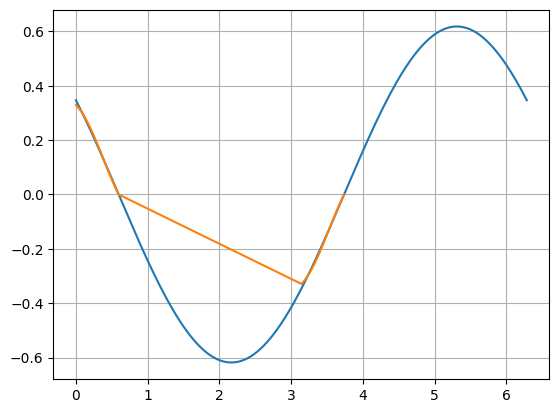

In [3]:
beta_2q = np.concatenate((beta, beta + np.pi))
ct_2q = np.concatenate((ct, -ct))
n = 1

A = np.array([np.cos(i*beta_2q) for i in range (1,n+1)] + [np.sin(i*beta_2q) for i in range (1,n+1)]).T
b = ct_2q.T

x, resid, rank, s = np.linalg.lstsq(A, b)

beta_4q = np.linspace(0, 2 * np.pi, 1000)
plt.figure()
plt.plot(beta_4q, np.array([np.cos(i*beta_4q) for i in range (1,n+1)] + [np.sin(i*beta_4q) for i in range (1,n+1)]).T @ x)
plt.plot(beta_2q, ct_2q)

# plt.ylim([0, 0.4])
# plt.xlim([0, 0.6])
# plt.yticks([-2.4, -2.0, -1.6, -1.2, -0.8, -0.4, 0, 0.4, 0.8, 1.2, 1.6])
plt.grid()
print(x)



In [4]:
x

array([ 0.34654894, -0.5114336 ])

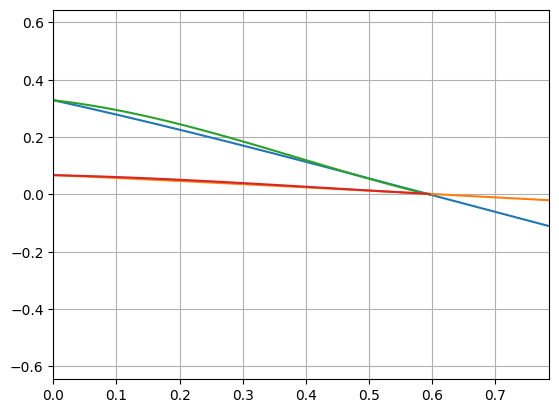

In [5]:
from numpy import pi, atan2, cos, sin
from numpy.linalg import solve


prop = pp.WageningenBPropeller(blades=4, area_ratio=0.7, pd_ratio=1.4)

beta = np.linspace(0, 2 * pi, 1000)

plt.plot(beta, prop.ct(beta))
plt.plot(beta, prop.cq(beta))

j = np.linspace(0, prop.j_max)
beta = np.atan(j / 0.7 / np.pi)
kt = prop.kt(j)
kq = prop.kq(j)
ct = 8 * kt / np.pi / (j**2 + 0.7**2 * np.pi**2)
cq = 8 * kq / np.pi / (j**2 + 0.7**2 * np.pi**2)

plt.plot(beta, ct)
plt.plot(beta, cq)
plt.xlim(0, pi/4)
plt.grid()


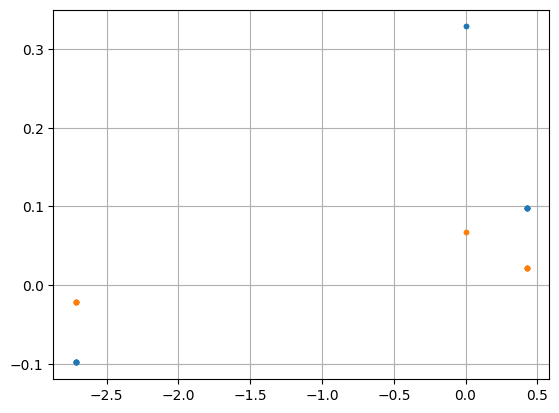

In [6]:
from propy.propeller import WorkingPoint4Q, PerformancePoint4Q

prop = pp.WageningenBPropeller(blades=4, area_ratio=0.7, pd_ratio=1.4)

wp = WorkingPoint4Q(
    rotation_speed=[1, 2, 3, 3, 3, 2 , 1, 0, -1, -2, -3, -3, -3, -2, -1, 0],
    speed=[1, 2, 3, 3, 3, 2 , 1, 0, -1, -2, -3, -3, -3, -2, -1, 0],
)

perf = prop.find_performance_4q(wp)

plt.plot(perf.beta, perf.ct, '.')
plt.plot(perf.beta, perf.cq, '.')


# plt.xlim(0, pi/4)
plt.grid()

In [7]:
wp = WorkingPoint4Q(
    rotation_speed=np.linspace(1, 2, 1000),
    speed=1,
)

In [8]:
%%timeit
prop.find_performance_4q(wp)

73.1 μs ± 811 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [9]:
wp = pp.WorkingPoint(
    thrust = np.linspace(1, 2, 1000),
    speed = 1
)

In [10]:
%%timeit
prop.find_performance(wp)

18.2 ms ± 75.7 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
